In [27]:
#these magic statements can be removed once development is complete
%reload_ext autoreload
%autoreload 2

## Converting MVP notebook into an on-demand .py
## Takes input of member ID and metric type
## Produces relevant output

#custom-built module!
import metric_utils
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

df = pd.read_csv('./effectiveness.csv')

# demo purposes
from IPython.display import Image, display
%matplotlib inline

In [11]:
# input placeholders
temp_id = 'H001075'

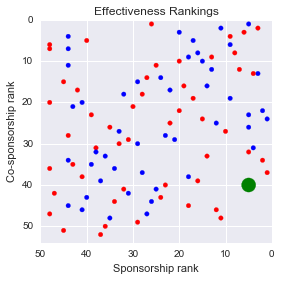

Effectiveness is an indication of how successful members are at writing bills that go on to become law. Being ranked #1 would mean that the member sponsors or cosponsors bills that make it further along in the legislative process, on average, than the rest of the members in his or her caucus. This figure shows the member's effectiveness both as a bills sponsor (horizontal axis) and cosponsor (vertical axis)

||big number stat     |blah blah blah                                    ||
---------------------------------------------------------------------------
||8                   |Bills sponsored                                   ||
||5 out of 46         |Sponsorship effectiveness compared to own party   ||
||143                 |Bills cosponsored                                 ||
||40 out of 46        |Cosponsorship effectiveness compared to own party ||


In [12]:
e = metric_utils.effectiveness()
e_fig_dict = e.generate_plot(df, temp_id)
e_fig_dict['fig']
plt.show()
print e_fig_dict['fig_explanation']
print ''
e_stats = e.key_stats(df, temp_id)
template = "||{0:20}|{1:50}||"
print template.format("big number stat", "blah blah blah")
print "-"*75
for key in e_stats:
    print template.format(e_stats[key]['stat'], e_stats[key]['stat_explanation'])

# ef should be able to get passed to the canvas via canvas=FigureCanvas(ef)
# in reference to https://scipy-cookbook.readthedocs.io/items/Matplotlib_Django.html

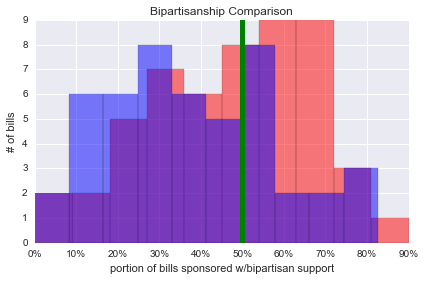

This Bipartisanship figure indicates the degree to which a member sponsors legislation that garners cosponsorship support from members of the opposite party. The blue and red sections show the distribution for democrats and republicans, respectively. The solid line shows where this particular member falls in their party's distribution. For this analysis, a bill is considered to have bipartisan support if at least 25% of its cosponsors were members from a party different from the sponsor's party.

||big number stat     |blah blah blah                                                        ||
-----------------------------------------------------------------------------------------------
||50.0%               |Percentage of sponsored bills that gained bipartisan cosponsorship    ||
||70.0%               |Percentage of own party out-performed in this metric                  ||


In [13]:
b = metric_utils.bipartisanship()
b_fig_dict = b.generate_plot(df, temp_id)
b_fig_dict['fig']
plt.show()
print b_fig_dict['fig_explanation']
print ''
b_stats = b.key_stats(df, temp_id)
template = "||{0:20}|{1:70}||"
print template.format("big number stat", "blah blah blah")
print "-"*95
for key in b_stats:
    print template.format(b_stats[key]['stat'], b_stats[key]['stat_explanation'])

### Campaign Contributions

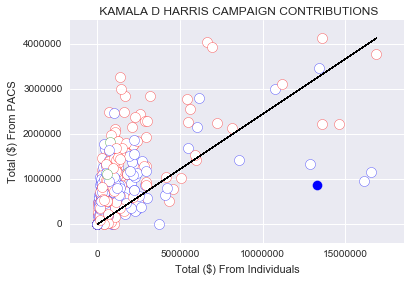

In [14]:
df1 = pd.read_csv("findata/fincampaign_w_twitter.csv",header=None)
f = metric_utils.financials()
ff = f.fin_plot(df1, temp_id)

#donor_ratio is the big metric we want here!

### Twitter Information

In [15]:
df_t = pd.read_csv('findata/final_twitter_df.csv')
t = metric_utils.twitter_stuff()
tt = t.twitter(df_t, temp_id)

#total_tweets can be the big metric

ImportError: No module named wordcloud

### Contact Information

In [ ]:
c = metric_utils.contact()
cc = c.contact_card('findata/contact_file.json', temp_id)

In [30]:
%autoreload 2

from api_utils import ProPublica
pp = ProPublica()
recent_bills = pp.get_recent_bills(temp_id)

for bill in recent_bills:
    print recent_bills[bill]['title']
    print recent_bills[bill]['url']
    print ''

A bill to amend title 18, United States Code, to provide that it is unlawful to knowingly distribute a private, visual depiction of an individual's intimate parts or of an individual engaging in sexually explicit conduct, with reckless disregard for the individual's lack of consent to the distribution, and for other purposes.
https://www.govtrack.us/congress/bills/115/s2162

A bill to amend the Internal Revenue Code of 1986 to exclude from gross income earthquake loss mitigation received under State-based earthquake loss mitigation programs.
https://www.govtrack.us/congress/bills/115/s2104

A bill to enhance cybersecurity information sharing and coordination at ports in the United States, and for other purposes.
https://www.govtrack.us/congress/bills/115/s2083

A resolution celebrating the 40th anniversary of the Senate Black Legislative Staff Caucus and its achievements in the Senate.
https://www.govtrack.us/congress/bills/115/sres317

A bill to designate certain Federal land in the S